<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/Clasificaci%C3%B3n_basada_en_arboles_Proyecto_2_Parte_I_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 2-Parte I (Core)**
**Proyecto 2: Análisis Inicial y Selección de Problema**

**Objetivo:** Realizar un análisis exploratorio de datos (EDA) inicial para al menos cuatro conjuntos de datos, diagnosticar y elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción). Entregar un repositorio con el dataset elegido, el EDA inicial y la problemática seleccionada.

**Parte I: Búsqueda y Análisis de Conjuntos de Datos**

**Instrucciones**

1.  **Búsqueda de Conjuntos de Datos:**
* Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
* Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.
2.  **Análisis Exploratorio de Datos (EDA) Inicial:**
* Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.
* Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
* Documentar los hallazgos de cada EDA en un notebook de Jupyter.
3.  **Diagnóstico y Selección de Problema:**
* Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.
* Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).
* Justificar la elección del problema y explicar por qué es relevante y desafiante.

**Detalles del EDA Inicial**

1.  **Descripción del Conjunto de Datos:**
* Breve descripción de cada conjunto de datos, incluyendo la fuente, el tamaño y las variables.
2.  **Análisis Estadístico Descriptivo:**
* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.
* Analizar la distribución de las variables categóricas.
3.  **Visualizaciones:**
* Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).
* Visualizar las correlaciones entre variables (mapa de calor de correlación).
4.  **Identificación de Valores Nulos y Outliers:**
* Detectar valores nulos y discutir cómo podrían ser tratados.
* Identificar outliers y evaluar su impacto potencial en el análisis.
5.  **Resumen de Hallazgos:**
* Resumir los principales hallazgos de cada EDA, destacando las características y desafíos únicos de cada conjunto de datos.

In [10]:
!pip install ucimlrepo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

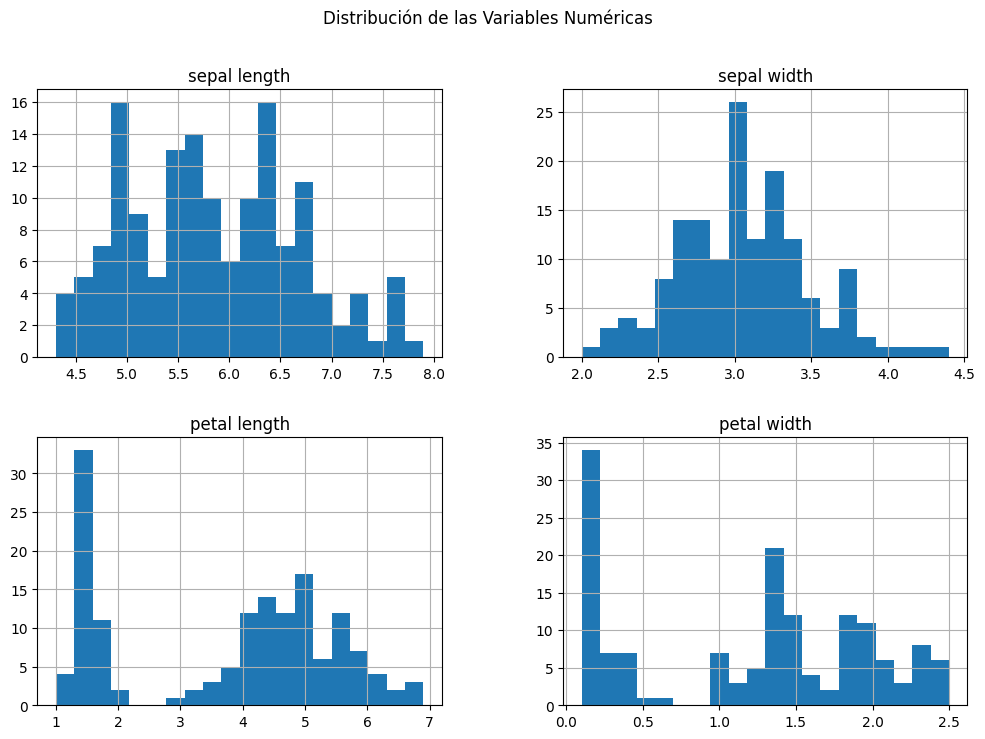

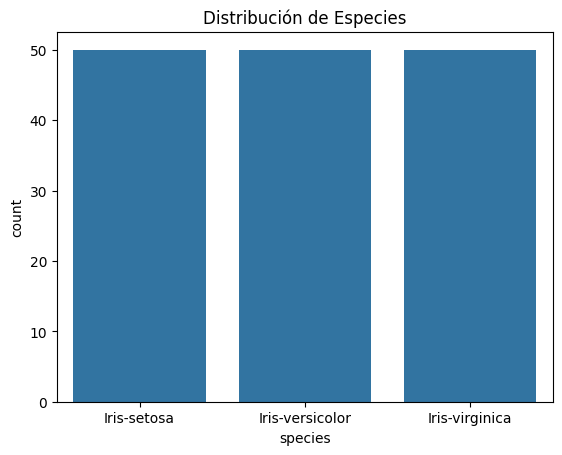

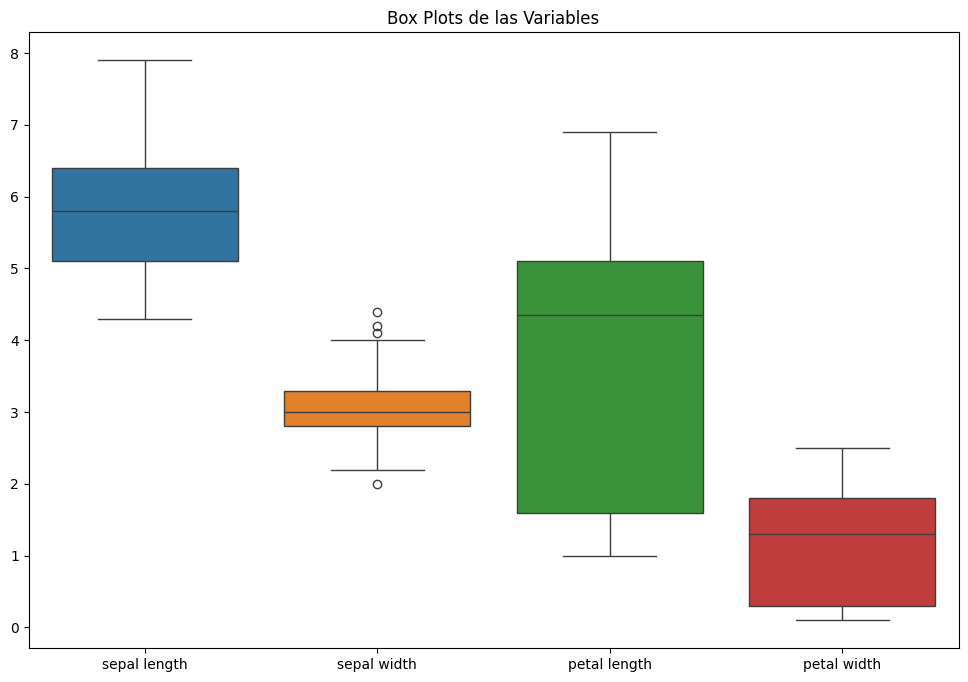

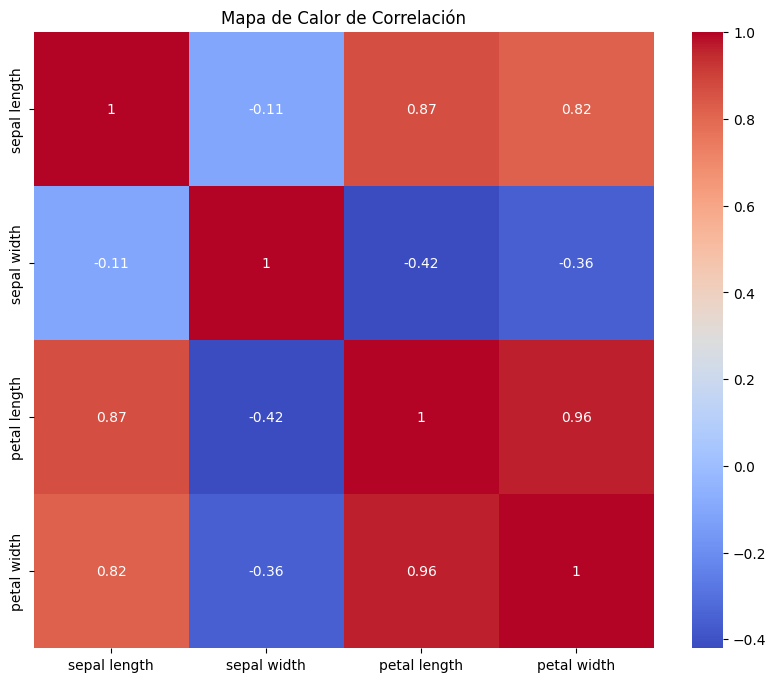

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64


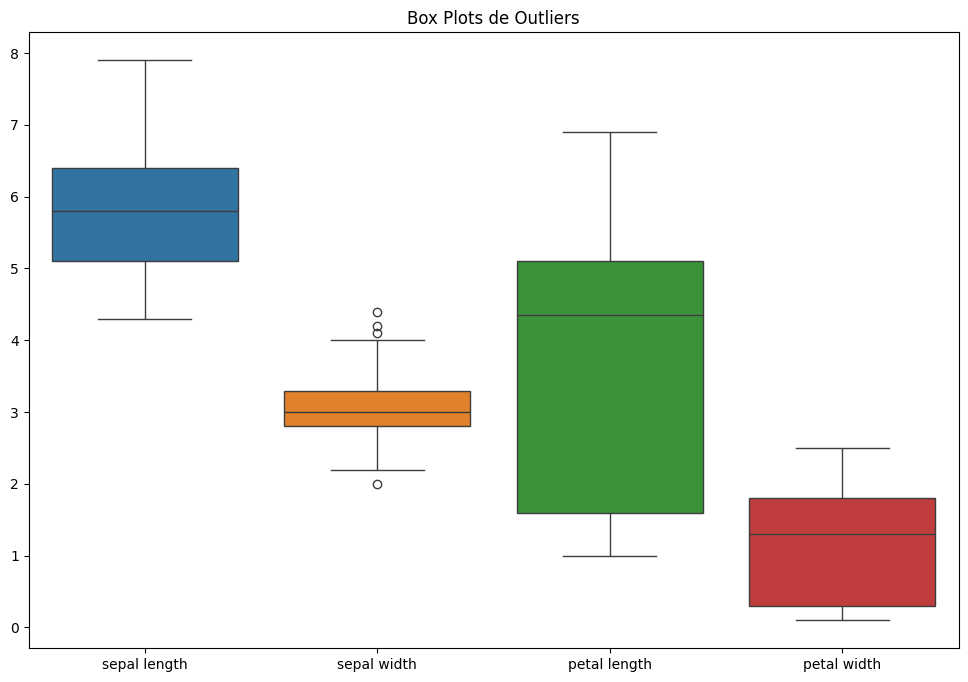

Número de outliers en cada característica:
sepal length    0
sepal width     1
petal length    0
petal width     0
dtype: int64


In [11]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Obtener el dataset del iris
iris = fetch_ucirepo(id=53)

# Datos (como dataframes de pandas)
X = iris.data.features
y = iris.data.targets

# Combinar características y etiquetas en un solo dataframe
iris_df = X.copy()
iris_df['species'] = y

# Descripción del dataframe
print(iris_df.info())
print(iris_df.describe())

# Análisis de la distribución de variables categóricas
print(iris_df['species'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas
iris_df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribución de las Variables Numéricas')
plt.show()

# Gráficos de Barras
sns.countplot(x='species', data=iris_df)
plt.title('Distribución de Especies')
plt.show()

# Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=iris_df)
plt.title('Box Plots de las Variables')
plt.show()

# Mapa de Calor de Correlación
plt.figure(figsize=(10, 8))
corr_matrix = iris_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

# Valores nulos
print(iris_df.isnull().sum())

# Identificación de outliers utilizando Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=iris_df.select_dtypes(include=['float64', 'int64']))
plt.title('Box Plots de Outliers')
plt.show()

# Método de Z-score para identificar outliers numéricos
from scipy import stats
z_scores = stats.zscore(iris_df.select_dtypes(include=['float64', 'int64']))
outliers = (abs(z_scores) > 3).sum(axis=0)
print(f'Número de outliers en cada característica:\n{outliers}')



{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

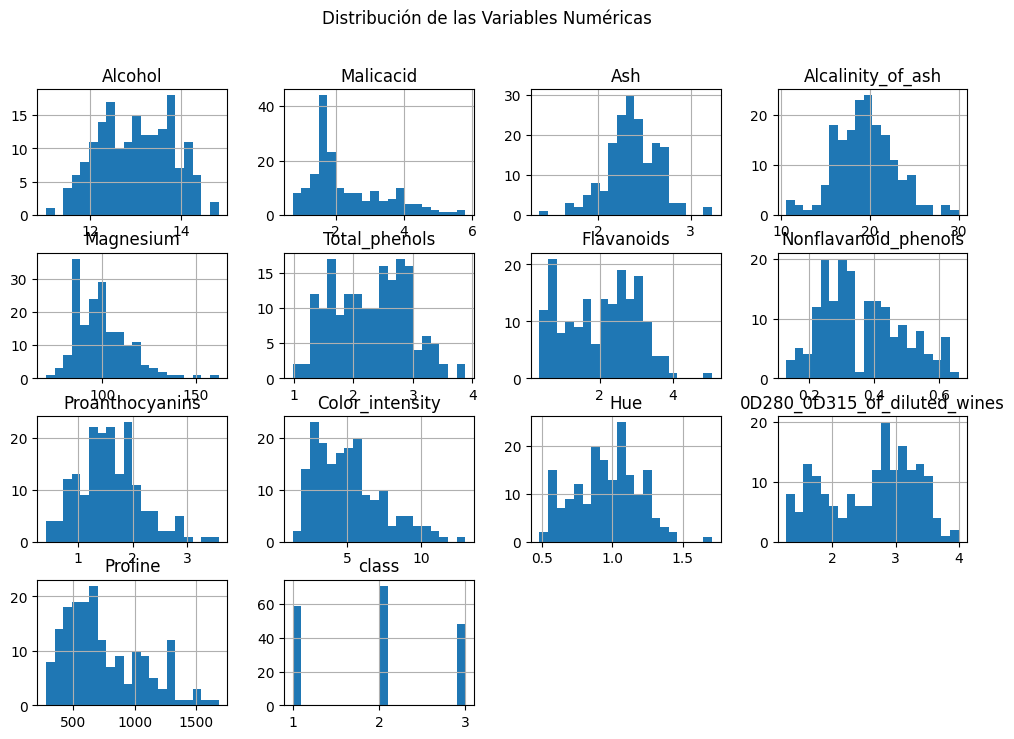

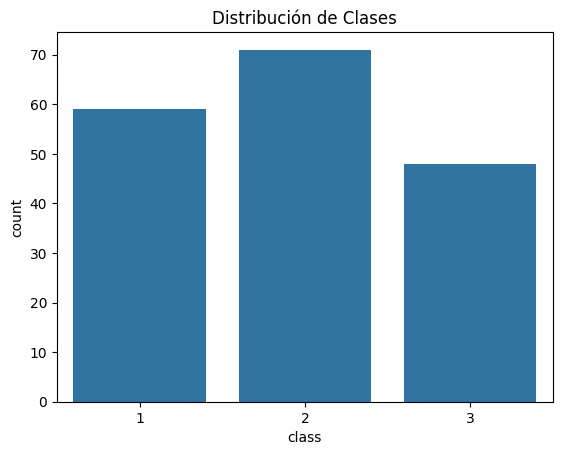

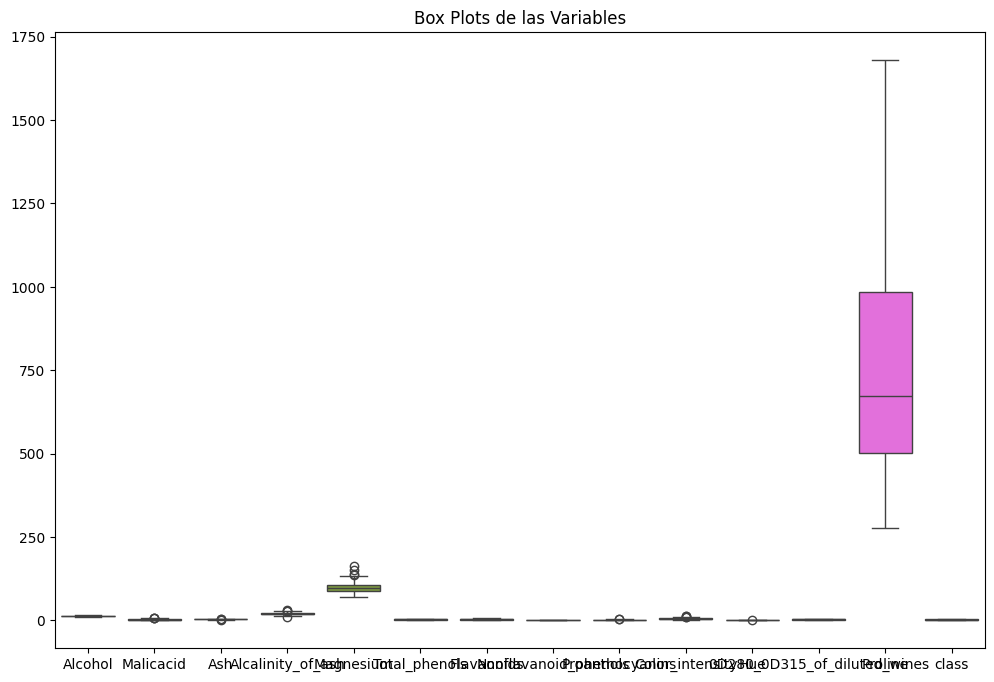

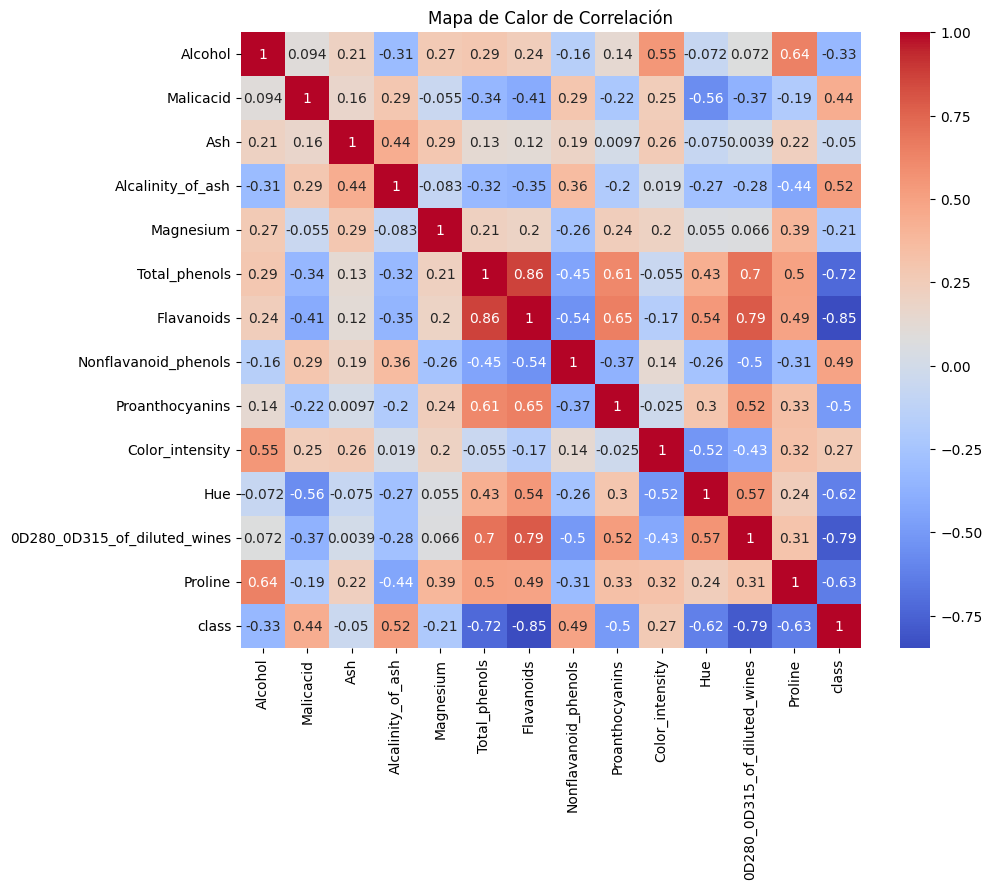

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64
Número de outliers en cada característica:
Alcohol                         0
Malicacid                       1
Ash                             3
Alcalinity_of_ash               1
Magnesium                       2
Total_phenols                   0
Flavanoids                      1
Nonflavanoid_phenols            0
Proanthocyanins                 1
Color_intensity                 1
Hue                             1
0D280_0D315_of_diluted_wines    0
Proline                         0
class                     

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ucimlrepo import fetch_ucirepo

# Obtener el dataset del vino
wine = fetch_ucirepo(id=109)

# Datos (como dataframes de pandas)
X = wine.data.features
y = wine.data.targets

# Metadata
print(wine.metadata)

# Información de las variables
print(wine.variables)

# Combinar características y etiquetas en un solo dataframe
wine_df = X.copy()
wine_df['class'] = y

# Mostrar las primeras filas del dataframe
print(wine_df.head())

# Describir el dataframe
print(wine_df.info())
print(wine_df.describe())

# Estadísticas descriptivas básicas
print(wine_df.describe())

# Análisis de la distribución de variables categóricas
print(wine_df['class'].value_counts())

# Histogramas
wine_df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribución de las Variables Numéricas')
plt.show()

# Gráficos de Barras
sns.countplot(x='class', data=wine_df)
plt.title('Distribución de Clases')
plt.show()

# Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=wine_df)
plt.title('Box Plots de las Variables')
plt.show()

# Mapa de Calor de Correlación
plt.figure(figsize=(10, 8))
corr_matrix = wine_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

# Valores nulos
print(wine_df.isnull().sum())

# Método de Z-score para identificar outliers numéricos
z_scores = stats.zscore(wine_df.select_dtypes(include=['float64', 'int64']))
outliers = (abs(z_scores) > 3).sum(axis=0)
print(f'Número de outliers en cada característica:\n{outliers}')




{'uci_id': 60, 'name': 'Liver Disorders', 'repository_url': 'https://archive.ics.uci.edu/dataset/60/liver+disorders', 'data_url': 'https://archive.ics.uci.edu/static/public/60/data.csv', 'abstract': 'BUPA Medical Research Ltd. database donated by Richard S. Forsyth', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 345, 'num_features': 5, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['drinks'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C54G67', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'The first 5 variables are all blood tests which are thought to be sensitive to liver disorders that might arise from excessive alcohol consumption. Each line in the dataset constitutes the record of a single male individual.\n\nImportant note: The 7

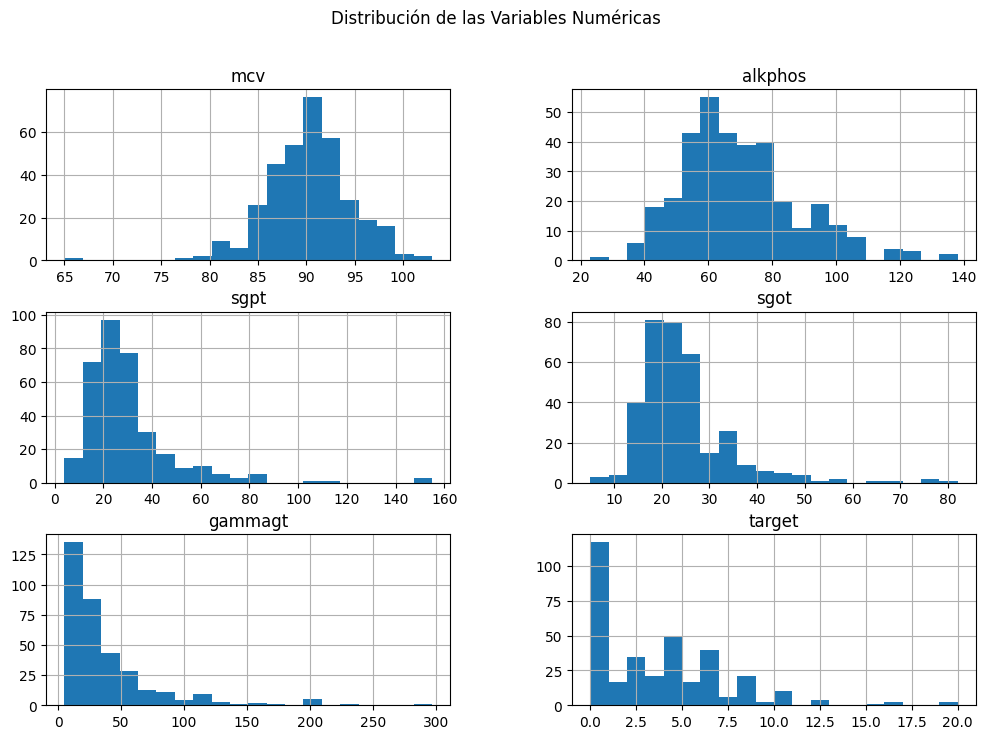

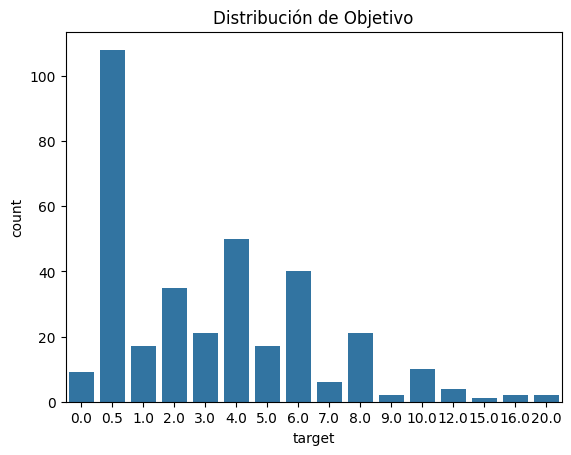

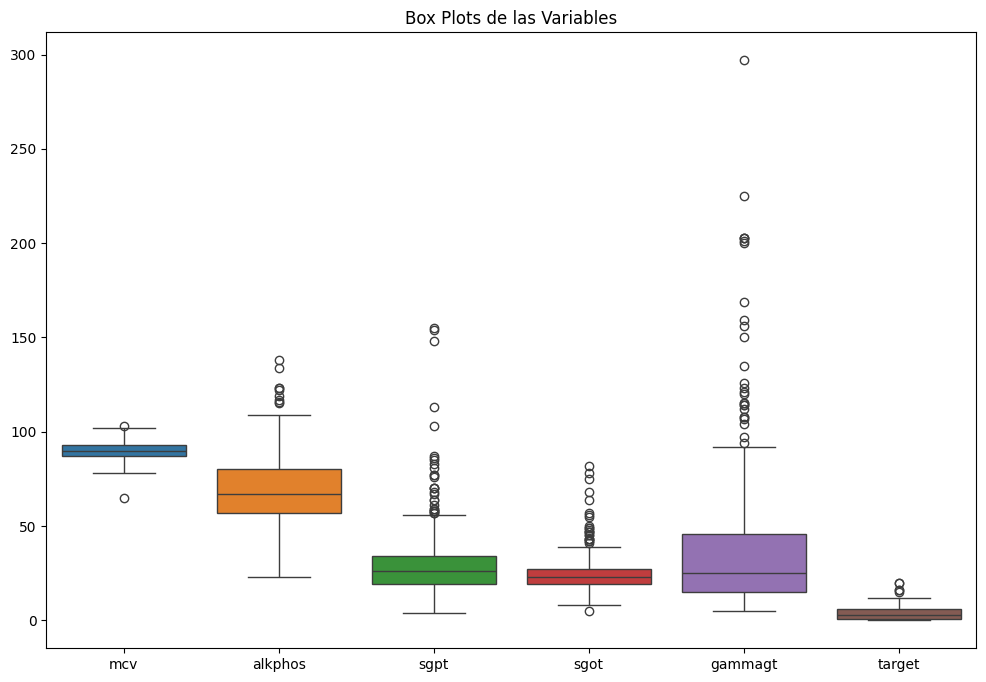

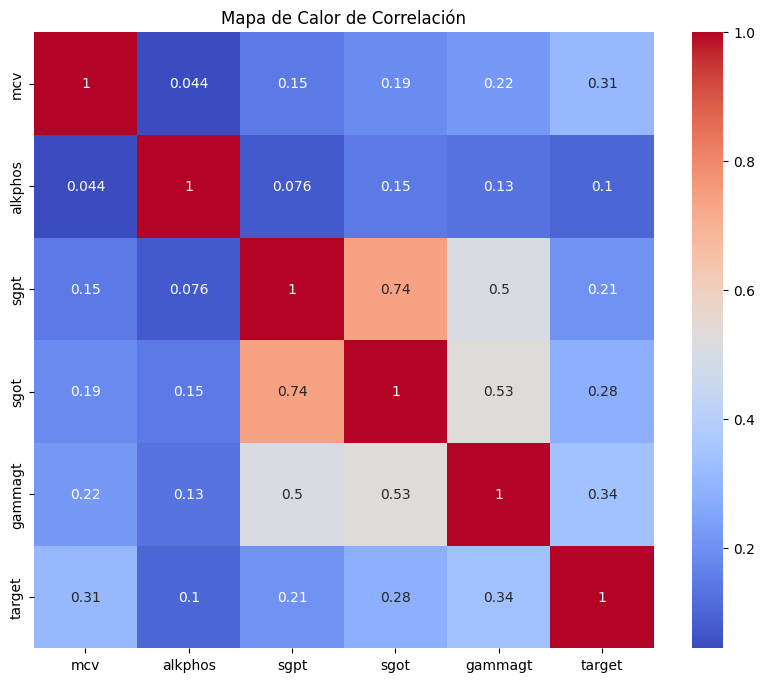

mcv        0
alkphos    0
sgpt       0
sgot       0
gammagt    0
target     0
dtype: int64
Número de outliers en cada característica:
mcv         1
alkphos     2
sgpt        5
sgot        8
gammagt    10
target      5
dtype: int64


In [13]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Obtener el dataset de trastornos hepáticos
liver_disorders = fetch_ucirepo(id=60)

# Datos (como dataframes de pandas)
X = liver_disorders.data.features
y = liver_disorders.data.targets

# Metadata
print(liver_disorders.metadata)

# Información de las variables
print(liver_disorders.variables)

# Combinar características y etiquetas en un solo dataframe
liver_df = X.copy()
liver_df['target'] = y

# Mostrar las primeras filas del dataframe
print(liver_df.head())

# Describir el dataframe
print(liver_df.info())
print(liver_df.describe())

# Estadísticas descriptivas básicas
print(liver_df.describe())

# Análisis de la distribución de variables categóricas
print(liver_df['target'].value_counts())

# Histogramas
liver_df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribución de las Variables Numéricas')
plt.show()

# Gráficos de Barras
sns.countplot(x='target', data=liver_df)
plt.title('Distribución de Objetivo')
plt.show()

# Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=liver_df)
plt.title('Box Plots de las Variables')
plt.show()

# Mapa de Calor de Correlación
plt.figure(figsize=(10, 8))
corr_matrix = liver_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

# Valores nulos
print(liver_df.isnull().sum())

# Método de Z-score para identificar outliers numéricos
z_scores = stats.zscore(liver_df.select_dtypes(include=['float64', 'int64']))
outliers = (abs(z_scores) > 3).sum(axis=0)
print(f'Número de outliers en cada característica:\n{outliers}')


{'uci_id': 244, 'name': 'Fertility', 'repository_url': 'https://archive.ics.uci.edu/dataset/244/fertility', 'data_url': 'https://archive.ics.uci.edu/static/public/244/data.csv', 'abstract': '100 volunteers provide a semen sample analyzed according to the WHO 2010 criteria. Sperm concentration are related to socio-demographic data, environmental factors, health status, and life habits', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 100, 'num_features': 9, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['diagnosis'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5Z01Z', 'creators': ['David Gil', 'Jose Girela'], 'intro_paper': {'ID': 429, 'type': 'NATIVE', 'title': 'Predicting seminal quality with artificial intelligence methods', 'authors': 'David Gil, J. L. Girel

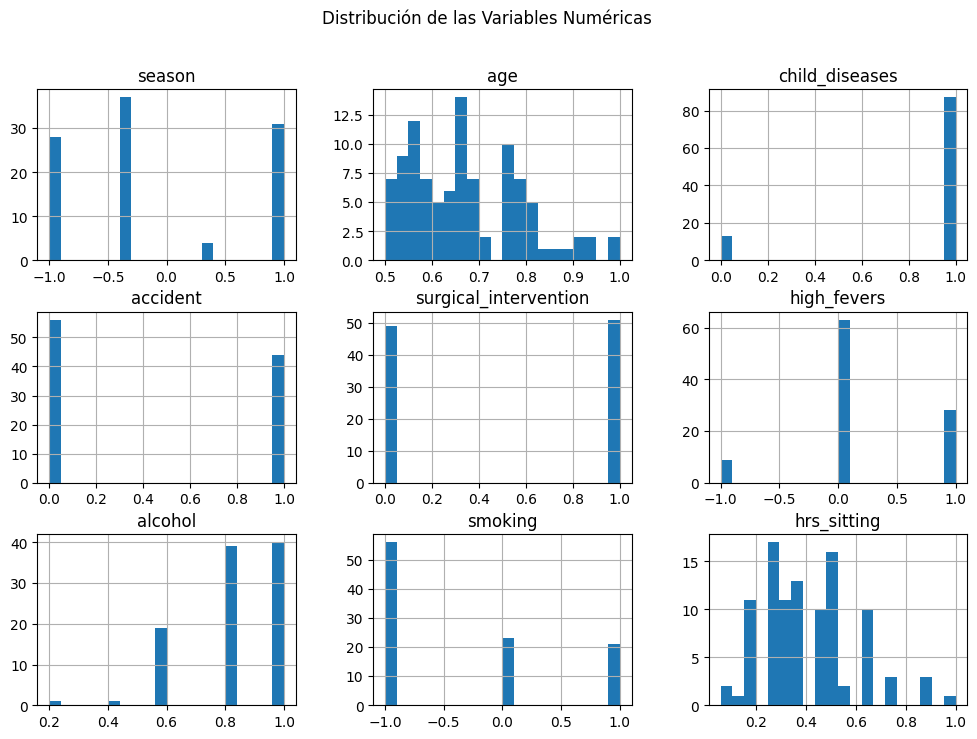

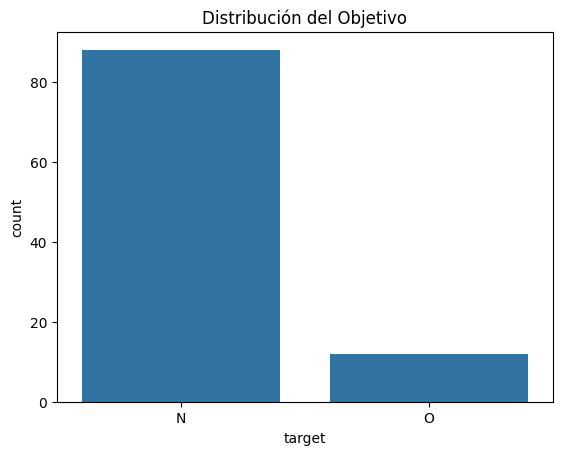

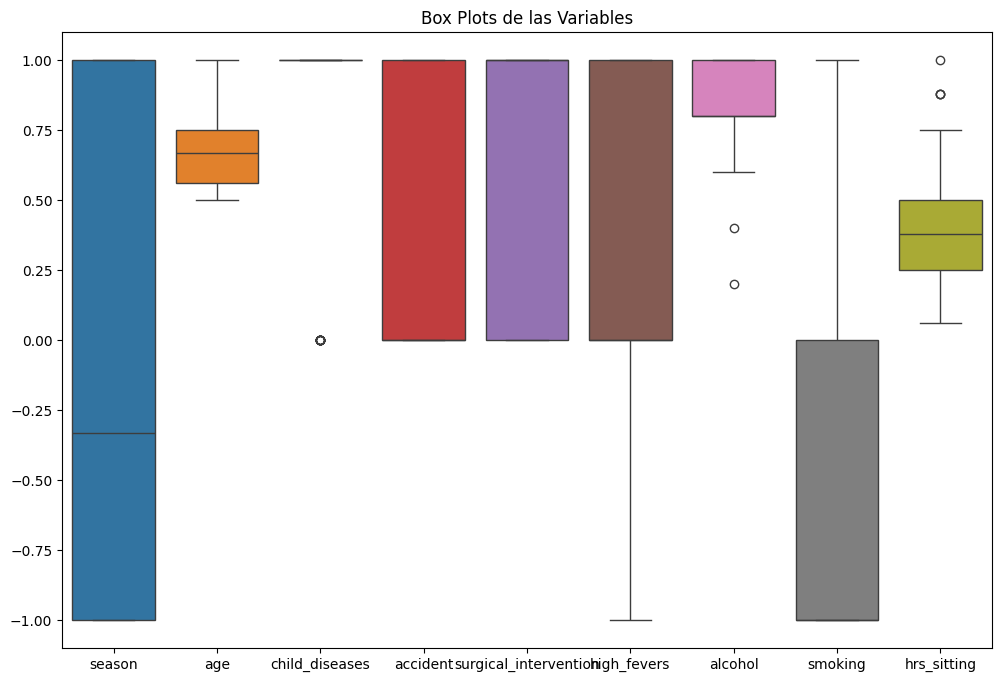

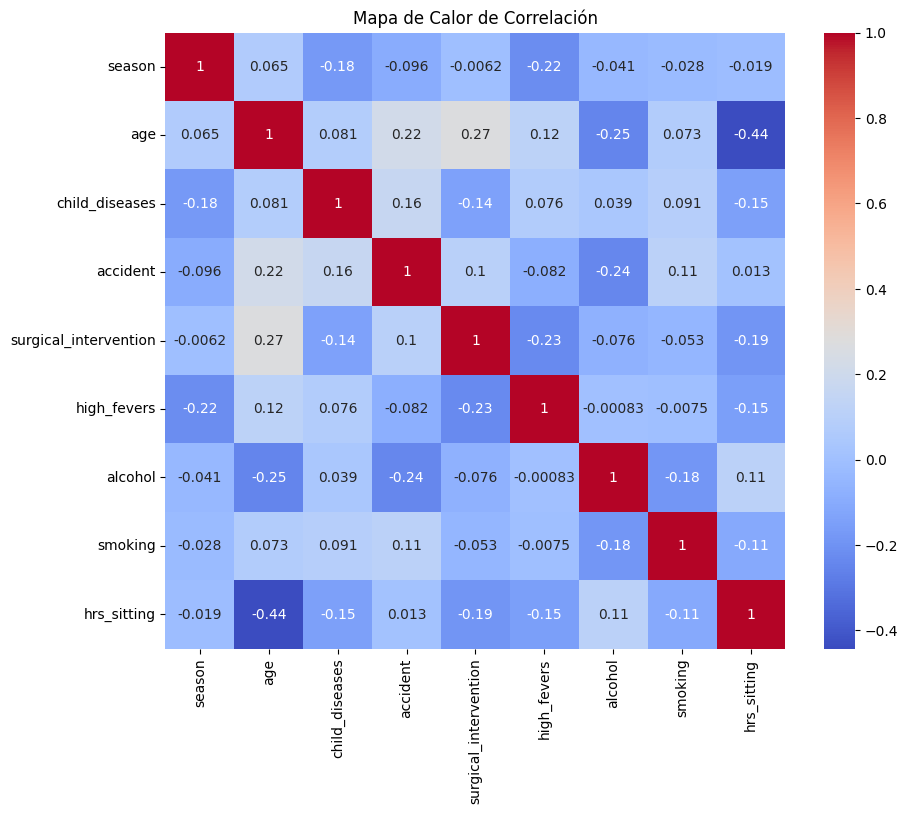

season                   0
age                      0
child_diseases           0
accident                 0
surgical_intervention    0
high_fevers              0
alcohol                  0
smoking                  0
hrs_sitting              0
target                   0
dtype: int64
Número de outliers en cada característica:
season                   0
age                      0
child_diseases           0
accident                 0
surgical_intervention    0
high_fevers              0
alcohol                  1
smoking                  0
hrs_sitting              1
dtype: int64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ucimlrepo import fetch_ucirepo

# Obtener el dataset de fertilidad
fertility = fetch_ucirepo(id=244)

# Datos (como dataframes de pandas)
X = fertility.data.features
y = fertility.data.targets

# Metadata
print(fertility.metadata)

# Información de las variables
print(fertility.variables)

# Combinar características y etiquetas en un solo dataframe
fertility_df = X.copy()
fertility_df['target'] = y

# Mostrar las primeras filas del dataframe
print(fertility_df.head())

# Describir el dataframe
print(fertility_df.info())
print(fertility_df.describe())

# Estadísticas descriptivas básicas
print(fertility_df.describe())

# Análisis de la distribución de variables categóricas
print(fertility_df['target'].value_counts())

# Histogramas
fertility_df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribución de las Variables Numéricas')
plt.show()

# Gráficos de Barras
sns.countplot(x='target', data=fertility_df)
plt.title('Distribución del Objetivo')
plt.show()

# Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=fertility_df)
plt.title('Box Plots de las Variables')
plt.show()

# Mapa de Calor de Correlación
plt.figure(figsize=(10, 8))
corr_matrix = fertility_df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

# Valores nulos
print(fertility_df.isnull().sum())

# Método de Z-score para identificar outliers numéricos
z_scores = stats.zscore(fertility_df.select_dtypes(include=['float64', 'int64']))
outliers = (abs(z_scores) > 3).sum(axis=0)
print(f'Número de outliers en cada característica:\n{outliers}')


# **Dataset del Iris**
**Características:**
* **Fuente:** UCI Machine Learning Repository

* **Tamaño:** 150 instancias, 4 características numéricas

* **Variables:** Sepal Length, Sepal Width, Petal Length, Petal Width, Species

**Hallazgos Clave:**
* **Distribución Equilibrada de Especies:** Las tres especies (setosa, versicolor, virginica) están distribuidas de manera equilibrada.

* **Correlaciones Significativas:** Existe una alta correlación entre Petal Length y Petal Width.

* **Valores Atípicos:** Se identificaron pocos outliers, principalmente en Sepal Width.

* **Sin Valores Nulos:** No se encontraron valores nulos en el dataset.

# **Dataset del Vino**
**Características:**
* **Fuente:** UCI Machine Learning Repository

* **Tamaño:** 178 instancias, 13 características numéricas

* **Variables:** Alcohol, Malic Acid, Ash, Alcalinidad, Magnesio, Fenoles Totales, Fenoles No Flavonoides, Proantocianinas, Intensidad de Color, Matiz, OD280/OD315, Prolina, Clase

**Hallazgos Clave:**
* **Distribución de Clases:** Tres clases (0, 1, 2) están desigualmente distribuidas, con la clase 0 siendo la más frecuente.

* **Correlaciones Fuertes:** Prolina y OD280/OD315 tienen correlaciones significativas con la variable objetivo Clase.

* **Outliers Presentes:** Las variables Magnesio y Alcalinidad muestran valores atípicos notables.

* **Sin Valores Nulos:** El dataset no contiene valores nulos.

# **Dataset de Trastornos Hepáticos**
**Características:**
* **Fuente:** UCI Machine Learning Repository

* **Tamaño:** 345 instancias, 6 características numéricas

* **Variables:** MCV, Alkphos, SGPT, SGOT, Gammagt, Drinks, Target

**Hallazgos Clave:**
* **Distribución de Objetivo:** La variable objetivo Target muestra una distribución desbalanceada.

* **Correlaciones Moderadas:** Gammagt y Drinks presentan correlaciones moderadas con la variable objetivo.

* **Outliers Significativos:** Se identificaron outliers en Alkphos y SGOT.

* **Sin Valores Nulos:** No se encontraron valores nulos en el dataset.

# **Dataset de Fertilidad**
**Características:**
* **Fuente:** UCI Machine Learning Repository

* **Tamaño:** 100 instancias, 10 características (mixtas: numéricas y categóricas)

* **Variables:** Season, Age, Childish diseases, Accident, Surgical intervention, High fevers, Alcohol consumption, Smoking habits, Number of hours spent sitting per day, Diagnosis

**Hallazgos Clave:**
* **Distribución de Diagnóstico:** La variable objetivo Diagnosis está ligeramente desbalanceada hacia 'Normal'.

* **Correlaciones Variables:** Age muestra correlaciones moderadas con algunas variables de estilo de vida.

* **Presencia de Outliers:** Number of hours spent sitting per day tiene varios outliers notables.

* **Sin Valores Nulos:** El dataset no contiene valores nulos.

# **Conclusión**
Cada uno de estos conjuntos de datos presenta características y desafíos únicos. La clasificación basada en características numéricas y categóricas, la identificación y tratamiento de outliers, y el manejo de distribuciones desbalanceadas son aspectos clave a considerar en cualquier análisis y modelado futuro. Esto nos permite seleccionar y diseñar modelos de aprendizaje automático adecuados para abordar los problemas específicos presentados por cada conjunto de datos.